In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
%matplotlib inline 

# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset=['RainTomorrow'],inplace=True)

# Training VAlidation and Test sets


<Axes: title={'center': 'no of rrows per year'}, xlabel='Date', ylabel='count'>

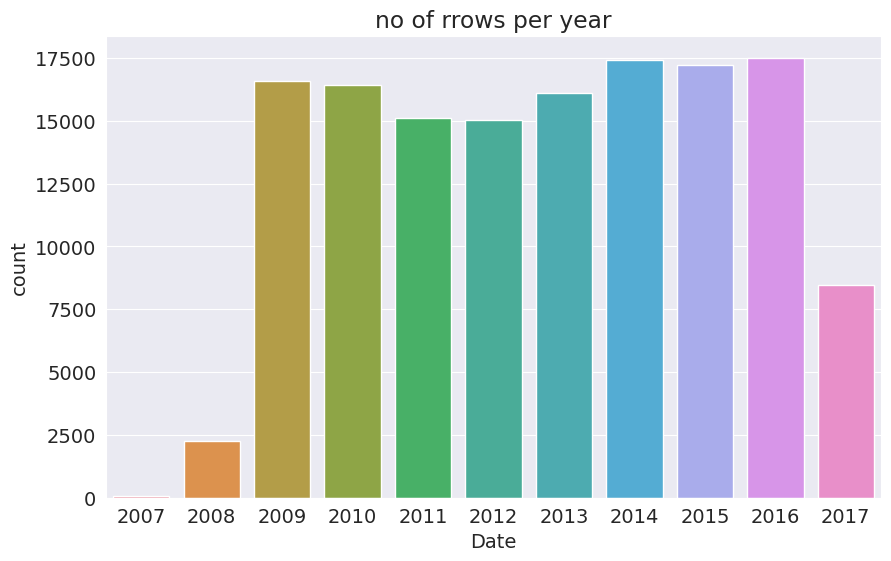

In [6]:
plt.title("no of rrows per year")
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [7]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [8]:
train_df.shape

(98988, 23)

In [9]:
val_df.shape

(17231, 23)

In [10]:
test_df.shape

(25974, 23)

# Input and Target Columns

In [11]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [12]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [13]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [14]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Lets identify Numeric columns and categoric columns

In [15]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categoric_cols = train_inputs.select_dtypes('object').columns.tolist()

In [16]:
from sklearn.impute import SimpleImputer



In [17]:
imputer = SimpleImputer()

In [18]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [19]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [20]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling the Numeric Cols

In [21]:
from sklearn.preprocessing import MinMaxScaler


In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [24]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [25]:
# test_inputs[numeric_cols].describe

# Now we deal with categoric columns


In [26]:
train_inputs[categoric_cols] = train_inputs[categoric_cols].fillna('Unknown')
val_inputs[categoric_cols] = val_inputs[categoric_cols].fillna('Unknown')
test_inputs[categoric_cols] = test_inputs[categoric_cols].fillna('Unknown')

In [27]:
test_inputs[categoric_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [28]:
train_inputs[categoric_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder


In [30]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [31]:
encoder.fit(df[categoric_cols])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [32]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [33]:
encoded_cols = encoder.get_feature_names_out(categoric_cols)

In [34]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoric_cols])


/tmp/ipykernel_33/1092499231.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoric_cols])
/tmp/ipykernel_33/1092499231.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categoric_cols])
/tmp/ipykernel_33/1092499231.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [35]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoric_cols])

/tmp/ipykernel_33/467749375.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoric_cols])
/tmp/ipykernel_33/467749375.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categoric_cols])
/tmp/ipykernel_33/467749375.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [36]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoric_cols])

/tmp/ipykernel_33/3475431408.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoric_cols])
/tmp/ipykernel_33/3475431408.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categoric_cols])
/tmp/ipykernel_33/3475431408.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

In [37]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,Unknown,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
test_inputs.columns.tolist()

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Pen

In [39]:
columns_to_drop=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

As a final step, lets drop the 'text' type categoric cols so that we re just left with numeric data 

In [40]:
X_train = train_inputs.drop(columns = columns_to_drop)
X_val = val_inputs.drop(columns = columns_to_drop)
X_test = test_inputs.drop(columns = columns_to_drop)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model = DecisionTreeClassifier(max_depth = 3,random_state=42)

In [43]:
%%time
model.fit(X_train,train_targets)

CPU times: user 747 ms, sys: 44.7 ms, total: 792 ms
Wall time: 796 ms


DecisionTreeClassifier(max_depth=3, random_state=42)

In [44]:
??model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(max_depth=3, random_state=42)
File:        /opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py
Source:     
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are ex

In [45]:
train_preds = model.predict(X_train)

In [46]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [47]:
pd.value_counts(train_preds)

/tmp/ipykernel_33/1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     88001
Yes    10987
Name: count, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [49]:
accuracy_score(train_preds,train_targets)

0.8291308037337859

We can alsoheck the probablities

In [50]:
train_probs = model.predict_proba(X_train)

In [51]:
train_probs

array([[0.91679616, 0.08320384],
       [0.91679616, 0.08320384],
       [0.91679616, 0.08320384],
       ...,
       [0.91679616, 0.08320384],
       [0.91679616, 0.08320384],
       [0.91679616, 0.08320384]])

In [52]:
model.score(X_val,val_targets)

0.8334397307178921

In [53]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 5583\nvalue = [3457, 2126]'),
 Text(0.6875, 0.125, 'gini = 0.471

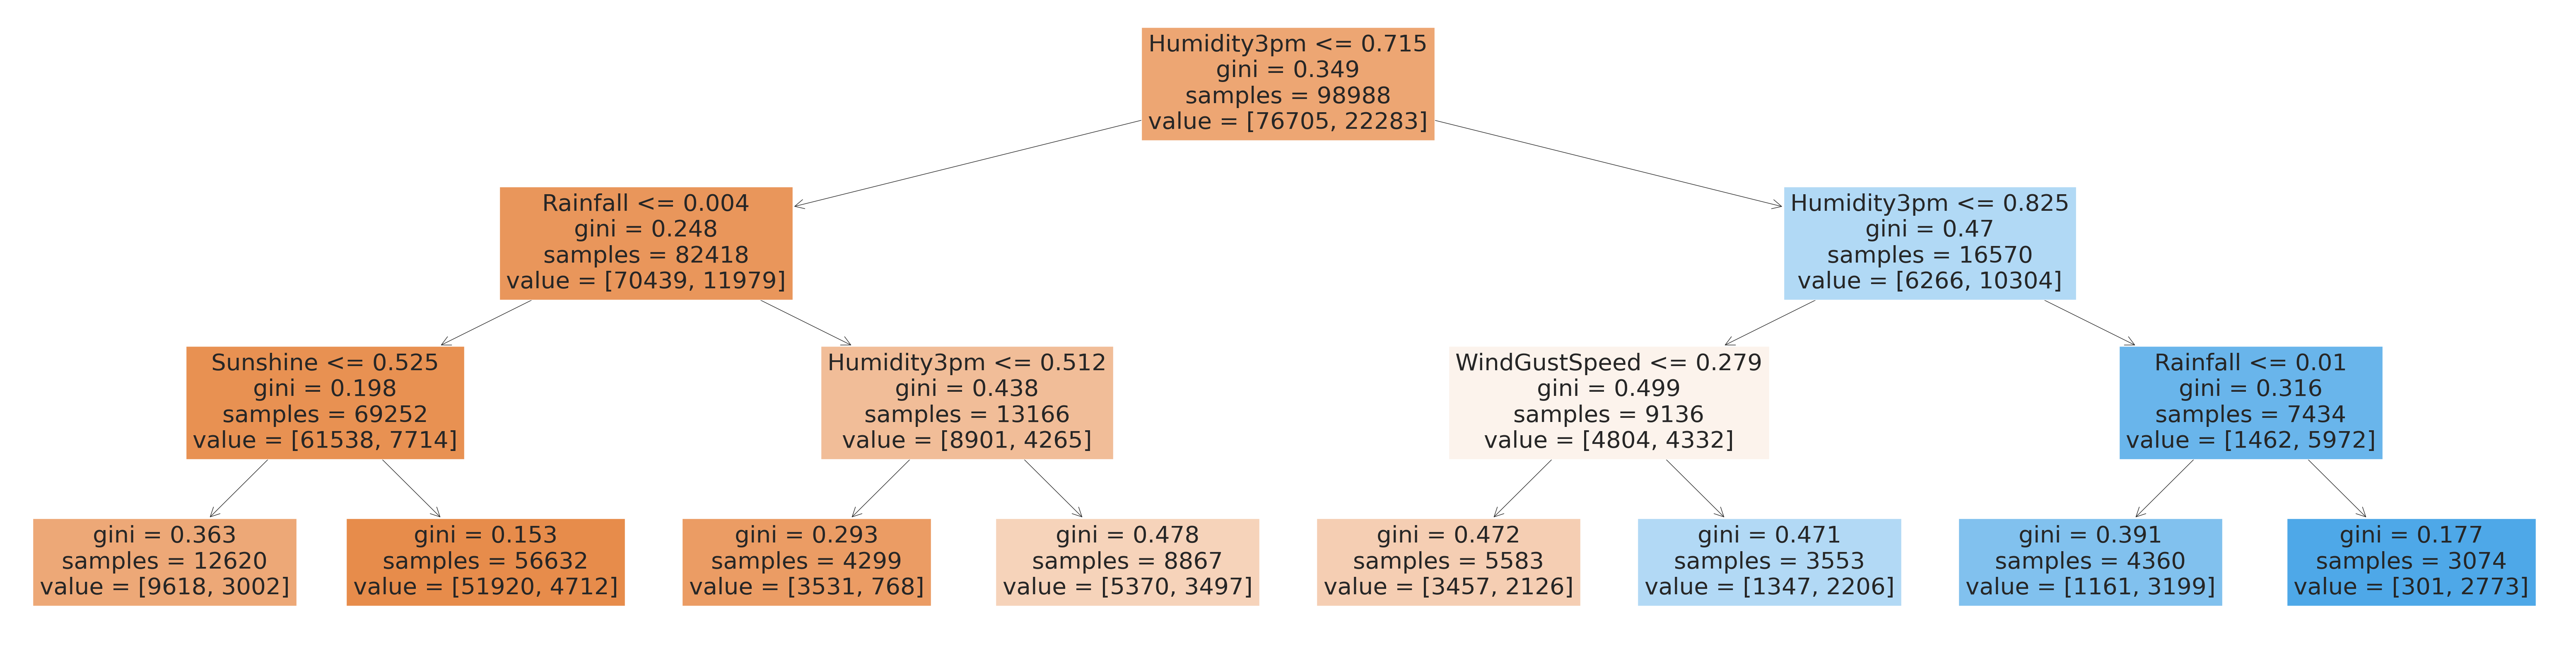

In [54]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names = X_train.columns, max_depth = 3, filled = True)

In [55]:
model.score(X_test,test_targets)

0.8235928235928236

In [56]:
model.tree_.max_depth

3

# Feature Importances

In [57]:
model.feature_importances_

array([0.        , 0.        , 0.11887326, 0.        , 0.05327578,
       0.02700542, 0.        , 0.        , 0.        , 0.80084554,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
importance_df = pd.DataFrame ({
    'feature' : X_train.columns,
    'importance' : model.feature_importances_
    
}).sort_values('importance',ascending = False)

In [59]:
importance_df

,feature,importance
9,Humidity3pm,0.800846
2,Rainfall,0.118873
4,Sunshine,0.053276
5,WindGustSpeed,0.027005
83,WindDir9am_ENE,0.000000
...,...,...
38,Location_MountGambier,0.000000
37,Location_Moree,0.000000
36,Location_Mildura,0.000000
35,Location_MelbourneAirport,0.000000


<Axes: xlabel='importance', ylabel='feature'>

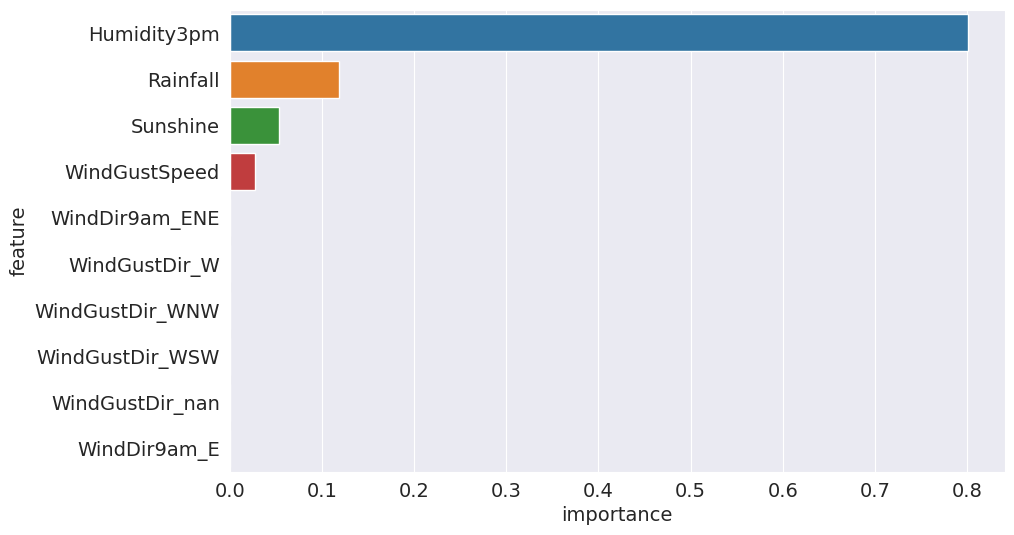

In [60]:
sns.barplot(data = importance_df.head(10),x='importance',y='feature')

In [61]:
?model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(max_depth=3, random_state=42)
File:        /opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split

In [62]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md,random_state = 42)
    model.fit(X_train,train_targets)
    train_error = 1 - model.score(X_train,train_targets)
    val_error = 1 - model.score(X_val,val_targets)
    return {'Max depth':md, 'Training Error' : train_error, 'Validation Error':val_error}

In [63]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: user 46.7 s, sys: 1.1 s, total: 47.8 s
Wall time: 47.8 s


In [64]:
errors_df

,Max depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140724,0.156346
9,10,0.132703,0.158319


 With the above data we can say that max_depth = 7**** provides the best validation score of  84.5%
 

In [65]:
model = DecisionTreeClassifier(max_depth=7,random_state=42).fit(X_train,train_targets)

In [66]:
model.score(X_train,train_targets)

0.8467693053703479

In [67]:
model.score(X_val,val_targets)

0.8452788578724392

In [68]:
model = DecisionTreeClassifier(max_leaf_nodes=128,random_state=42).fit(X_train,train_targets)

In [69]:
model.score(X_train,train_targets)

0.8480421869317493

In [70]:
model.score(X_val,val_targets)

0.8442342290058615

In [71]:
model.tree_.max_depth

12

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [73]:
model = RandomForestClassifier(n_jobs=1,random_state=42)

In [74]:
?model

Type:        RandomForestClassifier
String form: RandomForestClassifier(n_jobs=1, random_state=42)
File:        /opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity

In [75]:
%%time 
model.fit(X_train,train_targets)

CPU times: user 30.2 s, sys: 149 ms, total: 30.3 s
Wall time: 30.3 s


RandomForestClassifier(n_jobs=1, random_state=42)

In [76]:
model.score(X_train,train_targets)

0.9999595910615429

makes sense bcos we havent provided any limitations to the trees(max_depths and all)

In [77]:
model.score(X_val,val_targets)

0.8553769369160235

eventhough the training data is 99% accurate, the validation set accuracy is 85% 
This is the power of ensembling 


In [78]:
train_probs = model.predict_proba(X_train)

In [79]:
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

In [80]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Pressure9am <= 0.718\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Rainfall <= 0.003\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.375, 'WindDir9am_E <= 0.5\ngini = 0.201\nsamples = 41418\nvalue = [58053, 7422]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WindGustSpeed <= 0.349\ngini = 0.476\nsamples = 9901\nvalue = [9562, 6137]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

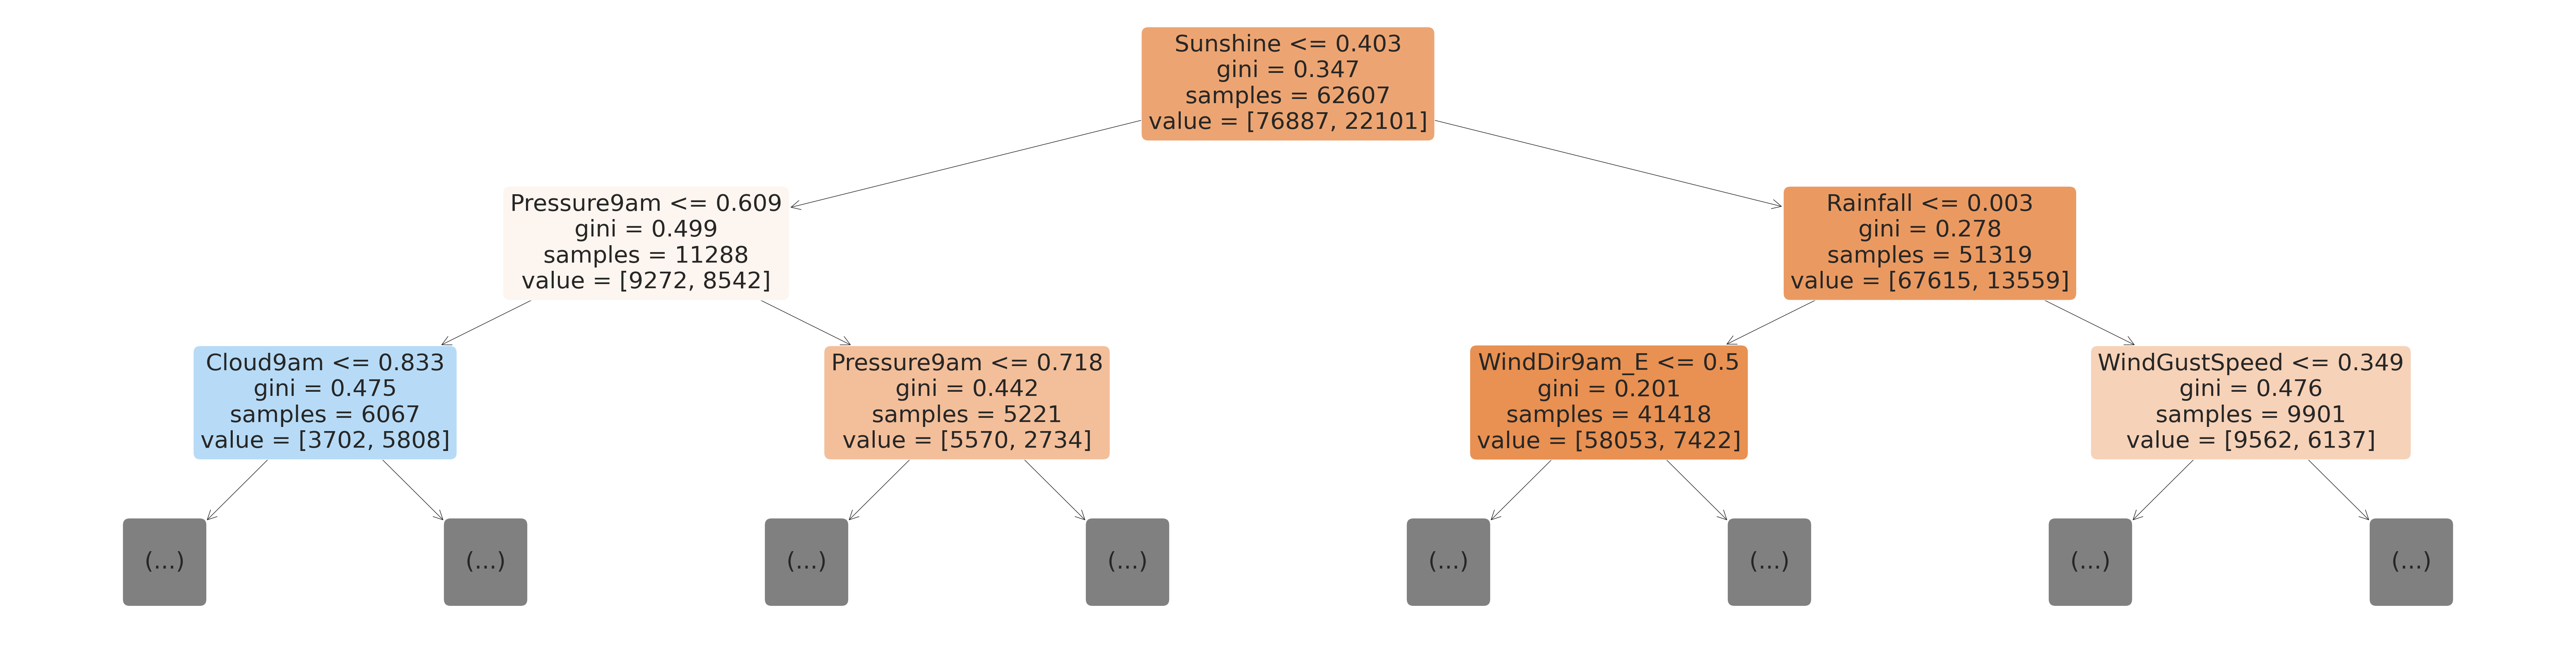

In [81]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],feature_names=X_train.columns,max_depth=2,filled=True,rounded=True)

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]'),
 Text(0.125, 0.375, 'WindSpeed9am <= 0.15\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindSpeed9am <= 0.062\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.745\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]'),
 Text(0.625, 0.375, 'Cloud3pm <= 0.278\ngini = 0.216\nsamples = 45991\nvalue = [63920, 8957]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_NorahHead <= 0.5\ngini = 0.48\nsamples = 4636\nvalue = [2927, 4410]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

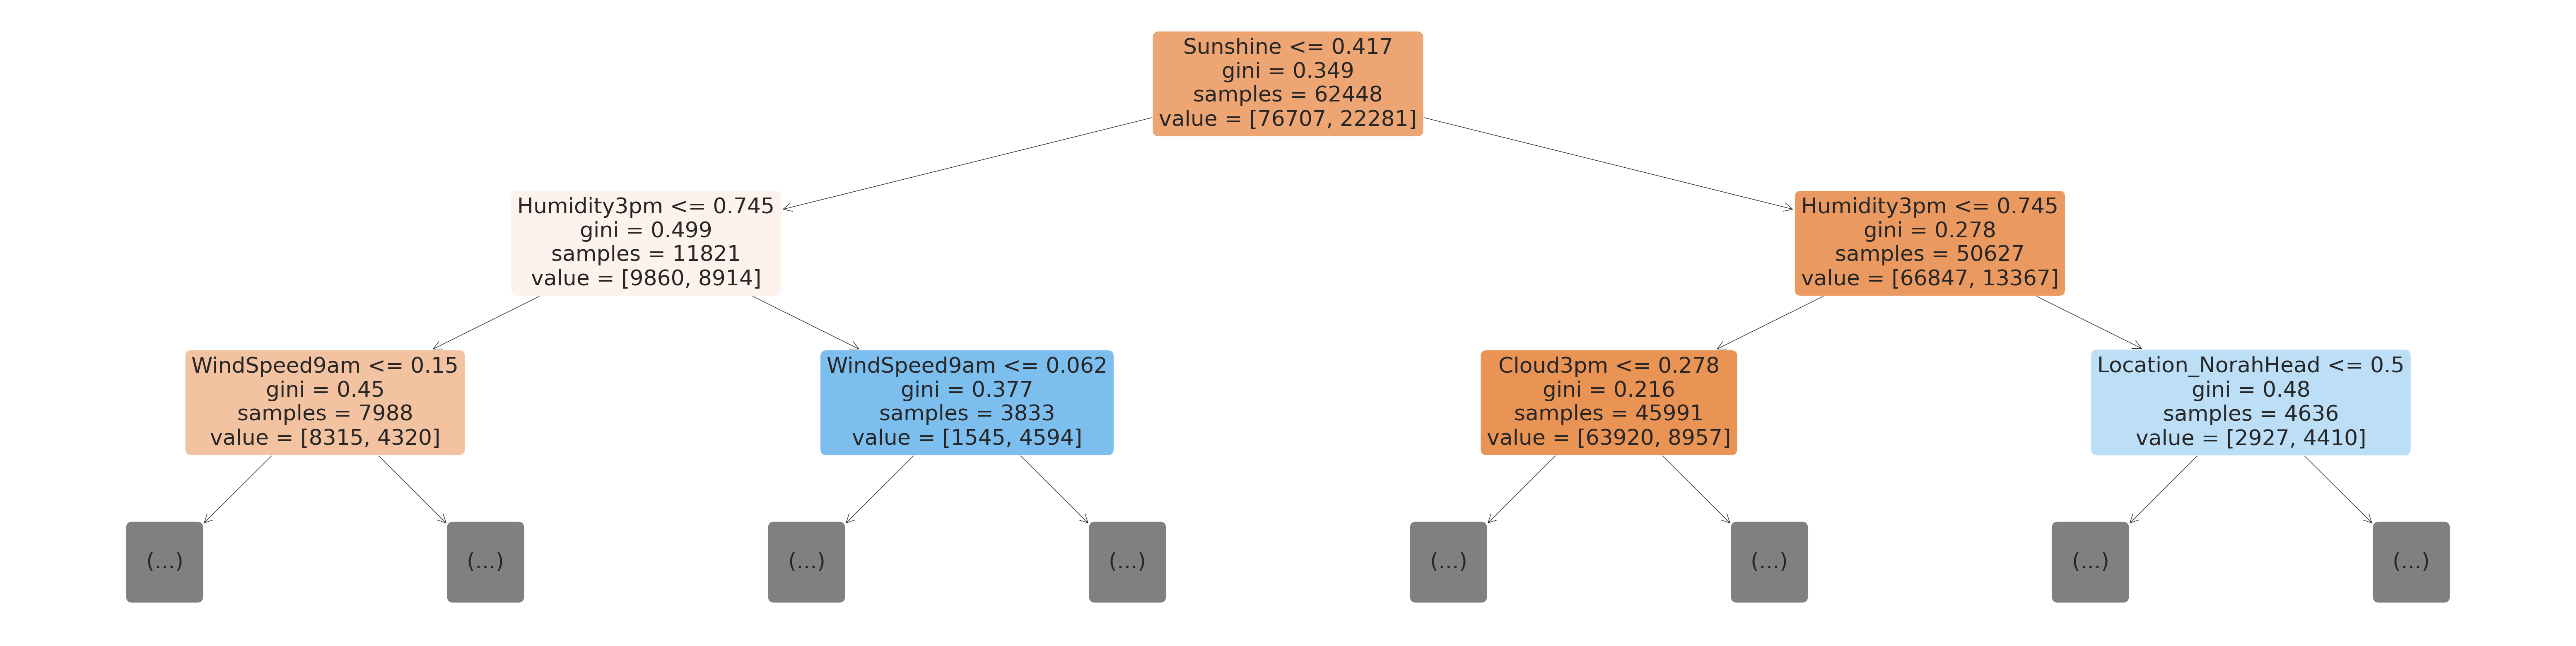

In [82]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15],feature_names=X_train.columns,max_depth=2,filled=True,rounded=True)

In [83]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : model.feature_importances_
}).sort_values('importance',ascending=False)

In [84]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139391
4,Sunshine,0.055504
11,Pressure3pm,0.054219
8,Humidity9am,0.050754
10,Pressure9am,0.048210
5,WindGustSpeed,0.047833
2,Rainfall,0.047278
15,Temp3pm,0.045182
1,MaxTemp,0.041811
0,MinTemp,0.041537


<Axes: title={'center': 'Feature Importances'}, xlabel='importance', ylabel='feature'>

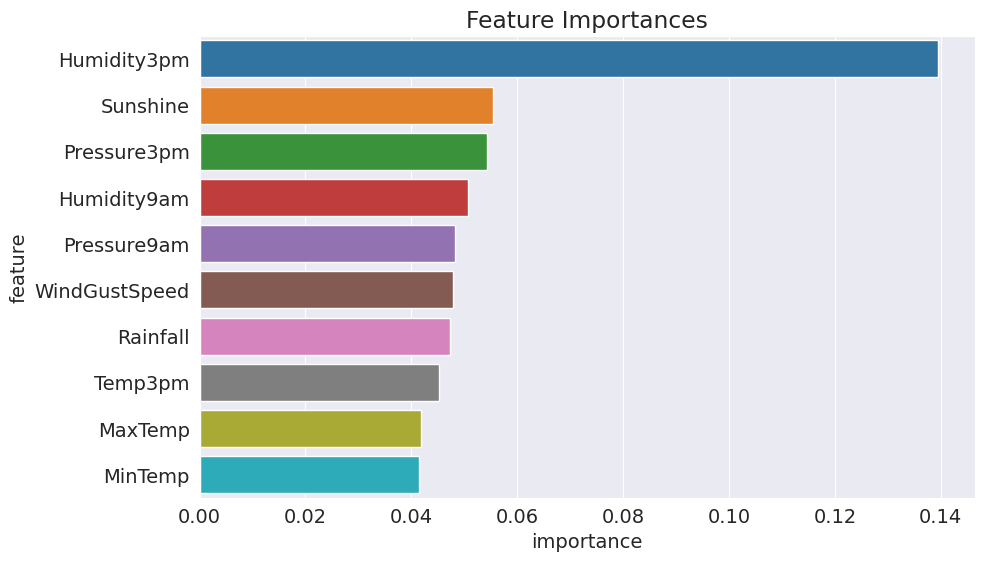

In [85]:
plt.title('Feature Importances')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

In [86]:
?model

Type:        RandomForestClassifier
String form: RandomForestClassifier(n_jobs=1, random_state=42)
Length:      100
File:        /opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for 

In [87]:
base_model = RandomForestClassifier(n_jobs=1,random_state=42).fit(X_train,train_targets)

In [88]:
base_train_acc = base_model.score(X_train,train_targets)
base_val_acc = base_model.score(X_val,val_targets)

In [89]:
base_accs=base_train_acc,base_val_acc

In [90]:
base_accs

(0.9999595910615429, 0.8553769369160235)

We can use this benchmark for hyperparameter tuninng

n_estimator(number of decision Trees, default 100)

1.n_estimators = 10

In [91]:
model = RandomForestClassifier(random_state=42, n_jobs=1, n_estimators=10).fit(X_train,train_targets)

In [92]:
model.score(X_train,train_targets),model.score(X_val,val_targets)


(0.9872105709783005, 0.8467297312982416)

In [93]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [94]:
model = RandomForestClassifier(n_jobs=1,random_state=42,n_estimators=500).fit(X_train,train_targets)

In [95]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8566537055307295)

In [96]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42,n_jobs=1,**params).fit(X_train,train_targets)
    return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [97]:
test_params(max_depth=5)

(0.8209681981654342, 0.8250826997852707)

In [98]:
test_params(max_depth=26)

(0.9816543419404372, 0.8567697754047937)

In [99]:
?model

Type:        RandomForestClassifier
String form: RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)
Length:      500
File:        /opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria a

In [100]:
model

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [101]:
test_params(max_features = 2)

(0.9999595910615429, 0.8503278973942313)

In [104]:
test_params(max_features = 'sqrt')

(0.9999595910615429, 0.8553769369160235)

In [103]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [105]:
model = RandomForestClassifier(n_jobs=1,
                              random_state=42,
                              n_estimators = 500,
                              max_features = 20,
                              max_depth=30,
                              class_weight={'No':1,'Yes':5})

In [106]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 5}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=1,
                       random_state=42)

In [108]:
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9997171374307997, 0.8567697754047937)

In [109]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [110]:
model.score(X_train,train_targets),model.score(X_test,test_targets)

(0.9997171374307997, 0.844921844921845)